# Домашнее задание 2

## Дедлайн 22.03.2018 (23.59 московское время) 

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_digits
from sklearn.cross_validation import cross_val_score, train_test_split, StratifiedKFold
from sklearn.metrics import make_scorer, precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

### Задание 1 Бэггинг над деревьями
1) Загрузите датасет digits с помощью функции load_digits из sklearn.datasets и подготовьте матрицу признаков X и ответы на обучающей выборке y.  

2) Для оценки качества далее нужно будет использовать cross_val_score из sklearn.cross_validation с параметром cv=10. Эта функция реализует k-fold cross validation c k, равным значению параметра cv. Используйте k=10, чтобы полученные оценки качества имели небольшой разброс.  Функция cross_val_score будет возвращать numpy.ndarray, в котором будет k чисел - значений качества в каждом из k экспериментов k-fold cross validation. Получите среднее значение, которое и будет оценкой качества работы.

3) Воспользуйтесь BaggingClassifier из sklearn.ensemble, чтобы обучить бэггинг над DecisionTreeClassifier. Используйте в BaggingClassifier параметры по умолчанию, задав только количество деревьев равным 100. Качество классификации новой модели - среднее значение cross_val_score. Сравните работу композиции деревьев с одним решающем деревом. 

4) Теперь изучите параметры BaggingClassifier и выберите их такими, чтобы каждый базовый алгоритм обучался не на всех d признаках, а на $\sqrt{d}$ случайных признаков. Каково качество работы алгоритма? 

5) Наконец, давайте попробуем выбирать случайные признаки не один раз на все дерево, а при построении каждой вершины дерева. Сделать это несложно: нужно убрать выбор случайного подмножества признаков в BaggingClassifier и добавить его в DecisionTreeClassifier. Какой параметр за это отвечает, можно понять из документации sklearn. Попробуйте выбирать опять же $\sqrt{d}$ признаков. Какое теперь качество полученного классификатора?

6) Полученный в пункте 4 классификатор - бэггинг на рандомизированных деревьях (в которых при построении каждой вершины выбирается случайное подмножество признаков и разбиение ищется только по ним). Это в точности соответствует алгоритму Random Forest. Сравнить качество работы классификатора с RandomForestClassifier из sklearn.ensemble.

7) Изучите, как качество классификации на данном датасете зависит от количества деревьев, количества признаков, выбираемых при построении каждой вершины дерева, а также ограничений на глубину дерева. Для наглядности лучше построить графики зависимости качества от значений параметров.

In [16]:
def show_pics(imgs, col, row):
    fig = plt.figure(figsize=(4*col,4*row))
    for i in range(0, col*row ):
        fig.add_subplot(row, col, i + 1)
        plt.imshow(imgs[i])

(1797, 64)


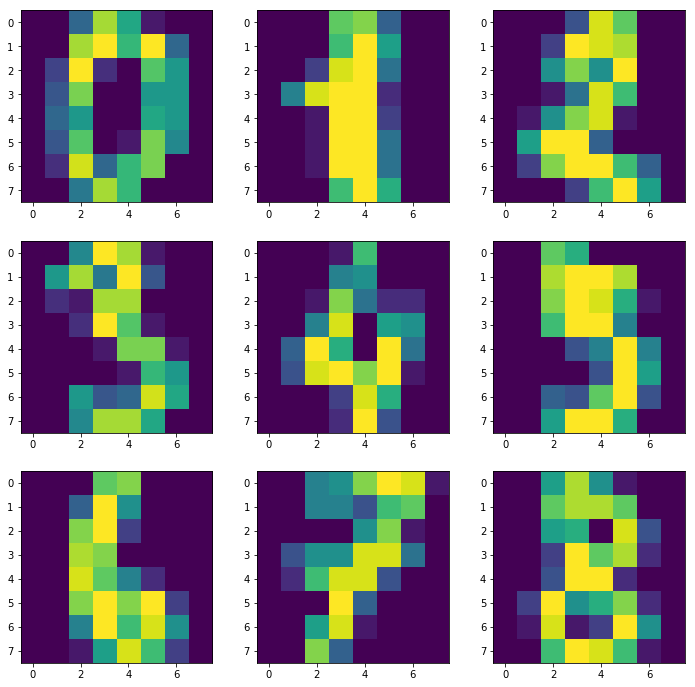

In [17]:
digits = load_digits()
print(digits.data.shape)

show_pics(digits.images[0:9], 3, 3)

In [18]:
data = digits.images.reshape((digits.data.shape[0], -1))
labels = digits.target

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
shuffle = StratifiedKFold(y_train, n_folds=10, random_state=42)
#scoring = make_scorer(precision_score(average='macro'), greater_is_better=True)

In [19]:
decide_tree = DecisionTreeClassifier()
score_tree = cross_val_score(decide_tree, X_train, y_train, cv=shuffle, scoring='precision_macro', verbose=1)
print('precision macro:', score_tree.mean())
score_tree = cross_val_score(decide_tree, X_train, y_train, cv=shuffle, verbose=1)
print('default metric:', score_tree.mean())

precision macro: 0.865372418002
default metric: 0.85463144617


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished


In [20]:
decide_bagging = BaggingClassifier()
score_bagg = cross_val_score(decide_bagging, X_train, y_train, cv=shuffle, scoring='precision_macro', verbose=1)
print('precision macro:',score_bagg.mean())
score_bagg = cross_val_score(decide_bagging, X_train, y_train, cv=shuffle, verbose=1)
print('default metric:',score_bagg.mean())

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.3s finished


precision macro: 0.931255000976
default metric: 0.92699729989


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.3s finished


**Композиция очевидно отработала лучше.**

In [21]:
decide_bagging_1 = BaggingClassifier(max_features=int(np.sqrt(data.shape[1])))
score_bagg_1 = cross_val_score(decide_bagging_1, X_train, y_train, cv=shuffle, scoring='precision_macro', verbose=1)
print('precision macro:', score_bagg_1.mean())
score_bagg_1 = cross_val_score(decide_bagging_1, X_train, y_train, cv=shuffle, verbose=1)
print('default metric:', score_bagg_1.mean())

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.4s finished


precision macro: 0.850896497465
default metric: 0.845602648507


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.4s finished


In [22]:
decide_bagging_2 = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_features='sqrt'))
score_bagg_2 = cross_val_score(decide_bagging_2, X_train, y_train, cv=shuffle, scoring='precision_macro', verbose=1)
print('precsion macro', score_bagg_2.mean())
score_bagg_2 = cross_val_score(decide_bagging_2, X_train, y_train, cv=shuffle, verbose=1)
print('default metric', score_bagg_2.mean())

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.4s finished


precsion macro 0.938218894324
default metric 0.949581435671


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.4s finished


### Random Forest

In [23]:
rfc = RandomForestClassifier()
score_forest = cross_val_score(rfc, X_train, y_train, cv=shuffle, scoring='precision_macro', verbose=1)
print('precision macro', score_forest.mean())
score_forest = cross_val_score(rfc, X_train, y_train, cv=shuffle, verbose=1)
print('default metric', score_forest.mean())

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.4s finished


precision macro 0.938797542327
default metric 0.94101877496


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.4s finished


Изучите, как качество классификации на данном датасете зависит от количества деревьев, количества признаков, выбираемых при построении каждой вершины дерева, а также ограничений на глубину дерева. Для наглядности лучше построить графики зависимости качества от значений параметров.

In [24]:
BaggingClassifier().get_params()

{'base_estimator': None,
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [25]:
params = {
    'n_estimators': [1, 5, 10, 30, 100],
    'max_features': [np.sqrt(data.shape[1])/2, np.sqrt(data.shape[1]), 2*np.sqrt(data.shape[1]), data.shape[1]]
}

In [26]:
num_of_params = len(params['n_estimators'])*len(params['max_features'])
results = np.zeros((num_of_params, 3))
count = 0
for i in params['n_estimators']:
    for j in params['max_features']:
        decide_bagging_ = BaggingClassifier(n_estimators=int(i), max_features=int(j))
        score_forest = cross_val_score(decide_bagging_, X_train, y_train, cv=10, scoring='precision_macro', verbose=1)
        results[count, 0] = int(i)
        results[count, 1] = int(j)
        results[count, -1] = score_forest.mean()
        count += 1

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]

In [27]:
results_df = pd.DataFrame(results, columns=['n_estimators', 'max_feature', 'precision_macro'])
results_df

,n_estimators,max_feature,precision_macro
0,1.0,4.0,0.346349
1,1.0,8.0,0.514922
2,1.0,16.0,0.708380
3,1.0,64.0,0.836149
4,5.0,4.0,0.581231
5,5.0,8.0,0.768930
6,5.0,16.0,0.877171
7,5.0,64.0,0.914700
8,10.0,4.0,0.673425
9,10.0,8.0,0.852492


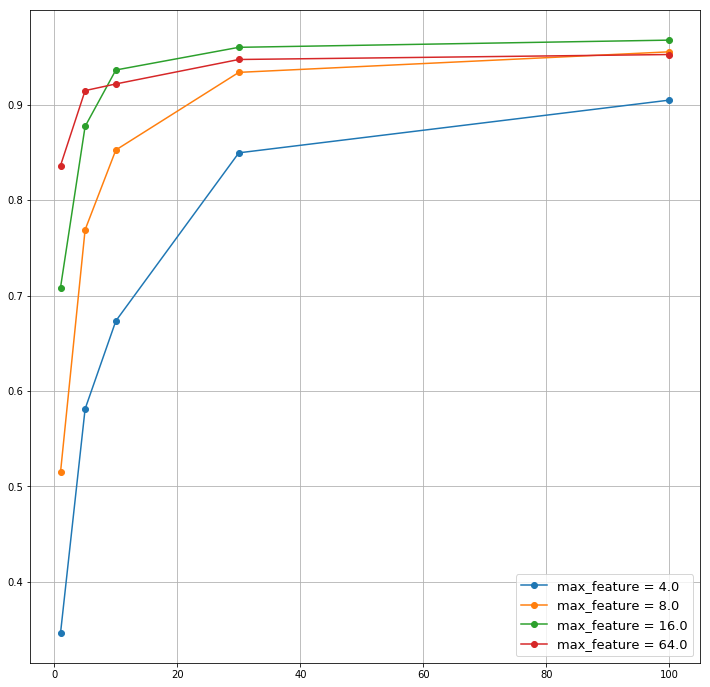

In [28]:
fig = plt.figure(figsize=(12, 12))
plt.grid('on')
for i in np.unique(results_df['max_feature']):
    plt.plot(results_df[results_df['max_feature']==i].values[:, 0], results_df[results_df['max_feature']==i].values[:, -1], '-o', label=('max_feature = '+str(i)))
    plt.legend(fontsize=13)

## Задание 2 Смещение и разброс методов обучения 

Исследуем численно разброс и смещение различных методов обучения. Данные будем генирировать искусственно, (x,y) - объект выборки представляет собой:

x  - случайная величина из одномерного распределения (рассмотрите три различных распределения: нормальное (np.random.normal(0, 0.3), экспоненциальное (np.random.exponential(0.3)), равномерное (np.random.uniform(-0.5, 0.5));

y (ответ) генерируется как сумма $f(x)=sin(\pi x)$ и случайного шума $\epsilon$ из равномерного распределения на [-0.2. 0.2]:
$$
y=sin(\pi x)+\epsilon
$$

Рассмотрим различные методы обучения: "LinearRegression", "DecisionTree", "RandomForest", "GradientBoosting". 

1) Сгенерируйте выборку размера N_objects=100, т.е. N_objects пар (x,y) из соответствующих распределений. Обучите одну из моделей (например, "LinearRegression") с параметрами по умолчанию на сгенерированной выборке . Постройте на одном графике объекты выборки и восстановленную регрессионную кривую. 

2) Рассмотрите ансамбль обучающих моделей. Сгенерируйте N_samples=25 случайных выборок размера N_objects=100, обучите и постройте все выборки и все регрессионные кривые $\mu^j$ (j=1,2,...25) на одном графике (полупрозрачным). Посчитайте среднюю кривую $\bar{\mu}$  как среднее арифмитическое регрессионных кривых. Изобразите эту кривую тоже на графике, а также истинную кривую ответов ($f(x)=sin(\pi x)$).

3) Вычислите смещение метода обучения: 

$$ Bias= E_{x,y} ((\mathbb{E}[y|x] - \mathbb{E}_X [\mu(X)]))$$. 


3.1) Сгенерируйте  N_objects=100 значений признака x. Для каждого x сгенерируйте N_y=100 значений y, т.е. объект выборки имеет вид:
$$
(x,[y_1,,y_2,,y_3,\dots ,y_{100}])
$$
3.2) Вычислите $\mathbb{E}[y|x]$ на объекте x как среднее арифмитическое значений y: 

$$
\mathbb{E}[y|x]=\frac{1}{N_y}\sum_{i=1}^{N_y} y_i
$$

3.3) Вычислите среднее предсказание $\mathbb{E}_X [\mu(X)]$ на объекте x - это значение построенной функции  $\bar{\mu}$ (см. пункт 2) 

3.4) Математическое ожидание $E_{x,y}(\dots)$ считаем как среднее арифмитическое по выборке N_objects.

4) Вычислите разброс метода обучения. Разброс - это среднеквадратичное отклонение предсказания алгоритмов метода $\mu$ на объекте x от среднего предсказания $\mathbb{E}_X [\mu(X)]$
$$ Var=E_{x,y} (E_{X}(\mathbb{E}_X [\mu(X)] - \mu(X)])^2)$$

4.1) На сгенерированной выборке для каждой кривой $\mu^j$ вычислите среднее арифмитическое по N_objects объектам, построенным в пункте 2: 
$$
Var^j=\frac{1}{N_{objects}}\sum_{i=1}^{N_{objects}} (\mu^j(x_i)-\bar{\mu}(x_i))^2
$$

4.2) Вычислите  среднее арифмитическое по N_samples алгоритмам:
$$
Var=\frac{1}{N_{samples}}\sum_{j=1}^{N_{samples}}Var^j
$$

5) Представьте результаты в виде таблицы, проанализируйте какой метод дает наименьший разброс, какой наименьшее смещение (почему?), как смещение и разброс связаны с распределением признака x. 

# Задание 3 Кластеризация

1) На данных по рукописным цифрам (см. задание 1) постройте модель кластеризации K_means.  

2) Используйте полученные метки кластеров как новый признак. Как изменится точность классификации при добавлении нового признака? Выведите соответствующую матрицу ошибок, метрики качества при микро и макро усреднении (используйте classification_report). В качестве классификатора используйте логистическую регрессию.
